<AxesSubplot:xlabel='new_date'>

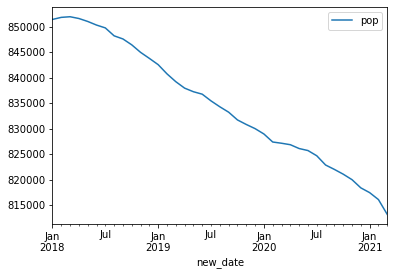

In [45]:
import pandas as pd

df = pd.read_csv('pop_2018.csv')

dates = pd.period_range(start = '2018-01-01',
                   	   end = None,
                       periods = 39,
                       freq = 'M')           

df['new_date'] = dates

series = df[['new_date', 'pop']]
series.set_index('new_date', inplace=True)
series.plot()

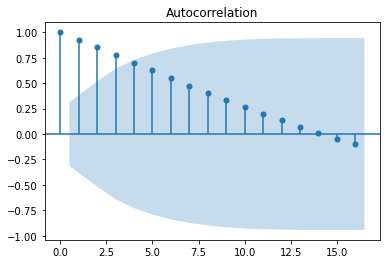

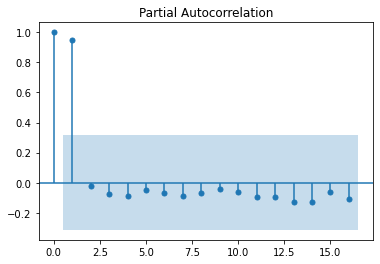

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series)
plot_pacf(series)
plt.show()

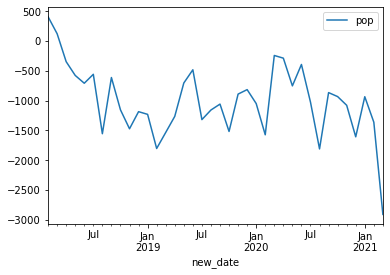

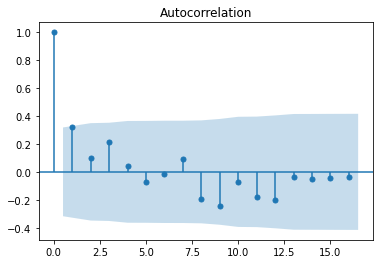

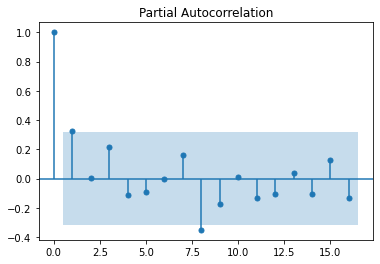

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\XNOTE\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.pop   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -293.124
Method:                       css-mle   S.D. of innovations            539.538
Date:                Thu, 22 Apr 2021   AIC                            592.248
Time:                        14:36:43   BIC                            597.161
Sample:                    02-28-2018   HQIC                           593.996
                         - 03-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1015.0198    131.837     -7.699      0.000   -1273.416    -756.624
ma.L1.D.pop     0.5195      0.150      3.462      0.001       0.225       0.814
                                    Roots       

In [49]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\XNOTE\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.pop   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -309.157
Method:                       css-mle   S.D. of innovations            817.916
Date:                Thu, 22 Apr 2021   AIC                            622.314
Time:                        14:39:23   BIC                            625.590
Sample:                    02-28-2018   HQIC                           623.480
                         - 03-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.pop     0.7300      0.086      8.532      0.000       0.562       0.898
                                    Roots                                    
                  Real          Imaginary         

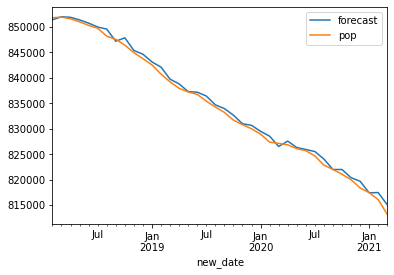

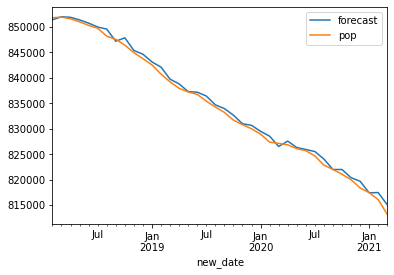

In [50]:
model_fit.plot_predict()

In [54]:
fore = model_fit.forecast(steps=9)
print(fore)

(array([811791.00872025, 811791.00872025, 811791.00872025, 811791.00872025,
       811791.00872025, 811791.00872025, 811791.00872025, 811791.00872025,
       811791.00872025]), array([ 817.91645267, 1634.38482198, 2161.81409216, 2583.73113768,
       2945.82637211, 3268.04520124, 3561.2281393 , 3832.04544374,
       4084.94782165]), array([[810187.92193065, 813394.09550985],
       [808587.6733323 , 814994.34410821],
       [807553.93095834, 816028.08648216],
       [806726.98874466, 816855.02869584],
       [806017.29512622, 817564.72231429],
       [805385.75782597, 818196.25961453],
       [804811.1298265 , 818770.887614  ],
       [804280.3376634 , 819301.6797771 ],
       [803784.65811108, 819797.35932942]]))
